In [1]:
## First of all we start setting up our working environment, for this projects we will be using PANDAS, Matplotlib and Seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")


Setup Complete


In [3]:
## PART ONE: EXPLORATORY DATA ANALISYS

In [4]:
## OK, let us just import the data and check the what the whole stuff is about

In [5]:
data_filepath = "reed_uk.csv"
data=pd.read_csv(data_filepath)
data

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,science jobs,Oxfordshire,Hays Specialist Recruitment Limited,uk,reed,Apply now Scientist - Cell Based Assays - Neu...,NaN,Scientist In vitro Cell-Free & Cell Based Assays,"Contract, full-time",3/7/2018,£22.00 - £26.00 per hour,South East England
49996,graduate training internships jobs,Northampton,The Graduate,uk,reed,Apply now Our client is looking for high achi...,Required skills Blue Chip Communication Skill...,Graduate Training Scheme - Recruitment,"Permanent, full-time",3/9/2018,"£18,000 - £21,000 per annum",Northamptonshire
49997,strategy consultancy jobs,City of London,Capgemini Consulting,uk,reed,Apply on employer's website Who youâ€™ll be w...,NaN,"Management Consultant - Retail Buying, Merchan...","Permanent, full-time",2/17/2018,Competitive salary,London
49998,purchasing jobs,Egham,Concept Human Solutions,uk,reed,"Apply now UNDERSTANDING, SERVICE, TRUST3 Word...",Required skills Procurement AV,AV Procurement Assistant,"Permanent, full-time",3/6/2018,"£27,500 - £30,000 per annum, negotiable, OTE",Surrey


In [6]:
## PART TWO: FEATURE ENGINEERING

In [7]:
## Let us explore out jobs dataset 

In [8]:
data.describe()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [9]:
##From the describe function we can conclude:
##Geo and city collumns have no different values


In [10]:
##let us check for missing values

<AxesSubplot:>

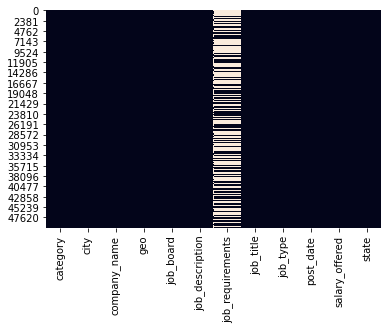

In [11]:
sns.heatmap(data.isnull(), cbar=False)


In [12]:
## We see that the job_requirements collumn has missing values. Before deciding how to proceed let´s check what´s the percentage of missing values

In [13]:
percent_missing = data['job_requirements'].isnull().sum() * 100 / len(data)

percent_missing 

58.904

In [14]:
## Around 60% of the job requirements column is missing, so we can consider dropping it as well as the columns without different values

In [15]:
del data['job_requirements']
del data['job_board']
del data['geo']


In [16]:
#Cheking out the new dataset

In [17]:
data.head()

,category,city,company_name,job_description,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,Apply now New opportunity not to be missed! H...,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,Apply now This role requires an experienced s...,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Apply now Job Title: Warehouse personLocation...,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,Apply now Castles Solicitors are looking for ...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,Apply now International Pharmaceutical Manufa...,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England


In [18]:
# Let´s see our job_type column

<AxesSubplot:xlabel='count', ylabel='job_type'>

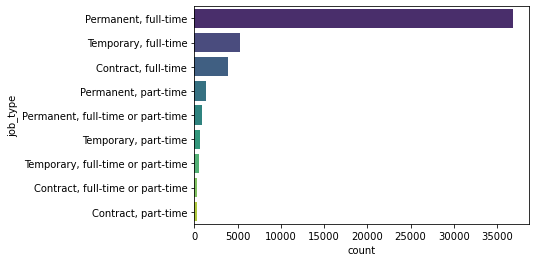

In [19]:
sns.countplot(y=data["job_type"],palette="viridis",order = data['job_type'].value_counts().index)




In [20]:
#We can have a better understanding of the data if we separate the job_type column into two diferent fields

In [21]:
new=data["job_type"].str.split(",", n = 1, expand = True)
data["job_contract"]=new[0]
data["job_time"]=new[1]
del data['job_type']


In [22]:
data.head()

,category,city,company_name,job_description,job_title,post_date,salary_offered,state,job_contract,job_time
0,catering jobs,Chudleigh,Haulfryn Group,Apply now New opportunity not to be missed! H...,Commis Chef,3/12/2018,"£18,323 per annum",Devon,Permanent,full-time
1,law jobs,Swindon,Reed,Apply now This role requires an experienced s...,Corporate Legal Secretary,3/8/2018,"£18,000 - £22,000 per annum",Wiltshire,Permanent,full-time
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,Apply now Job Title: Warehouse personLocation...,Warehouse Person,2/27/2018,Salary not specified,East Anglia,Permanent,full-time
3,law jobs,Hurstpierpoint,Castles Solicitors,Apply now Castles Solicitors are looking for ...,Legal Secretary / Admin Assistant,2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex,Permanent,full-time or part-time
4,factory jobs,Hertfordshire,Marketplace Group,Apply now International Pharmaceutical Manufa...,Category Planner - Pharmaceutical,3/1/2018,"£37,000 - £45,000 per annum",South East England,Permanent,full-time


<AxesSubplot:xlabel='count', ylabel='job_contract'>

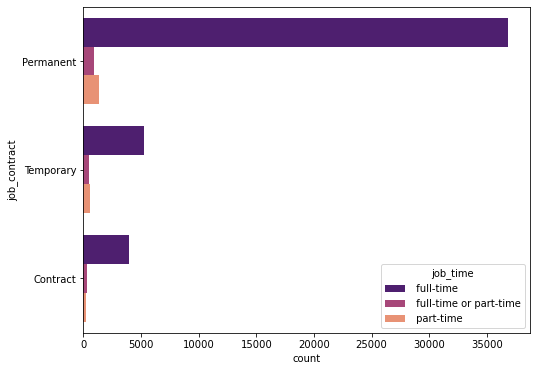

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(y=data["job_contract"],palette="magma",order = data['job_contract'].value_counts().index ,hue=data["job_time"])


In [24]:
#Having separated fields will help us for having a better understanding of the data. so far we can see that most 
#jobs are Permanent full time positions
#Another important preprocessing step is to turn the field salary_offered into something we can use to make
#comparisons and calculations
#But before starting with the parsing of that column we have got to realize that there are some job posts
#with non-specified salaries
#Let us check how many rows with specified salaries we have; as we can see, for those Jobs with a salary(range) specified
#

In [25]:
HasSalary=data['salary_offered'].str.contains("£|€").value_counts()
HasSalary

True     40969
False     9031
Name: salary_offered, dtype: int64

In [26]:
HasSalaryPercentage = HasSalary[1] * 100 / len(data)
HasSalaryPercentage

81.938

In [27]:
#Now, we see that around 82% of job posts specify a salary range. We could use 
#Machine learning models in order to make salary sugestions over the ones that are missing
#But first of all we gotta turn this field into something we can actually use
#So far, it seems that we have five kind of data in this field
#Salaries not specified
#Yearly Salaries within a range 
#Hourly salaries within a range
#Yearly salaries with specific values
#Hourly salaries with specific values
#Developer Note: Preprocessing non structured data could be really challenging.Finising this step took me a few hours and a couple
#Stackoverflow questions.
#We are going to turn this non structured data Into:
#-One column that indicates either the salary is yearly or hourly
#-Two columns indicating the minimun/maximun salary (0 for non-specified/Min=Max for specified salaries)
#Although there might be several different ways to extract data from a not structured field, it seems like the best way
#Is by using regex 
#Note:For the scope of this excercise I am going to ignore some aditional information provided in this field, such as 
#if the salary is negotiable, pro-rate,etc
#Note 2: There are a minority of salaries in currencies other than GBP,they are gonna be put into the others


In [34]:
import re
def extract_salaries(s):
    #Salary not specified
    s=s.strip()
    if(re.search(r'^[^0-9]+$', s)):       # True when there are no numbers in the salary field
        min_salary=0
        max_salary=0
        salary_type="Not Specified"
        currency="Not defined"
    #Salary within range
    elif(re.search(r'(?=.*[£$€¬].*[£$€¬])', s)): # True when two £ characters are found in the salary field
        currency="GBP" if s.find("£") != -1 else "other" 
        salary_type="hourly" if s.find("hour") != -1 else ("yearly" if s.find("annum") else "Undefined") 
        salary=s.replace(".00","")
        salary=salary.split("-")        
        max_salary=int(re.sub('[^0-9]','', salary[1].split(".")[0] ))
        min_salary=int(re.sub('[^0-9]','', salary[0].split(".")[0]))
    else:                                  # When there are numbers and only one £, the salary was specified
        currency="GBP" if s.find("£") != -1 else "other" 
        salary_type="hourly" if s.find("hour") != -1 else ("yearly" if s.find("annum") else "Undefined") 
        salary=s.replace(".00","")
        max_salary=min_salary=int(re.sub('[^0-9]','', salary.split(".")[0]))        
    return [min_salary,max_salary,salary_type,currency]
    
parsed_salaries= data['salary_offered'].apply(lambda x: extract_salaries(x))
parsed_salaries = pd.DataFrame(parsed_salaries.to_list(), columns=['min_salary', 'max_salary', 'salary_type','currency'])
data["min_salary"]=parsed_salaries["min_salary"]
data["max_salary"]=parsed_salaries["max_salary"]
data["salary_type"]=parsed_salaries["salary_type"]
data["currency"]=parsed_salaries["currency"]



In [35]:
del data['salary_offered']

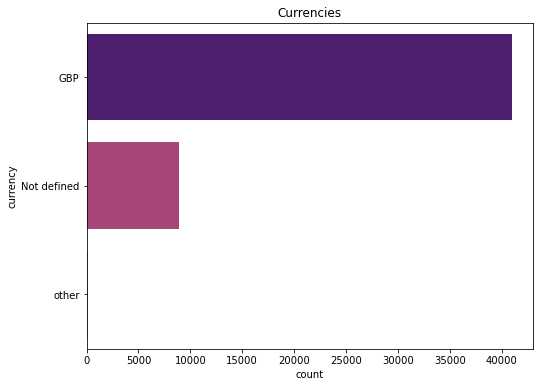

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(y=data["currency"],palette="magma",order = data['currency'].value_counts().index).set_title("Currencies")
plt.show()


In [37]:
#We see that there are a few of job post with salaries in other currencies, we could ignore them and focus on Jobs in salaries in GBP.
#However, for statistics purpuses it is important to clasiffy them correctly (In an earlier version of this notebook,data in other
#currencies broke the algorithm.
#One last preprocessing step could be deleting the redundant "jobs" word in the category field

In [38]:
def simplifyCategory(s):
    s=salary=s.replace(" jobs","")
    return s
    
simpleCat= data['category'].apply(lambda x: simplifyCategory(x))
data["category"] = pd.DataFrame(simpleCat.to_list(), columns=['category'])

In [39]:
#With our data preprocessed we can now make cool visualizations with it

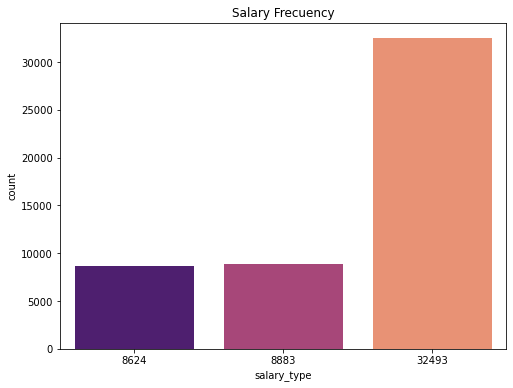

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x=data['salary_type'], data=data['salary_type'].value_counts(), palette="magma").set_title("Salary Frecuency")
plt.show()


Text(0.5, 1.0, 'Top 20 Job Categories')

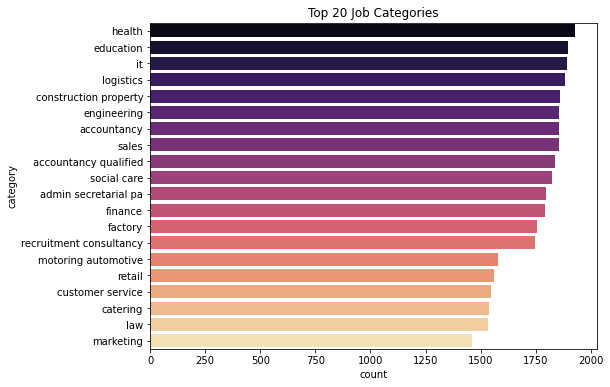

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(y=data.category,palette="magma",order = data['category'].value_counts()[0:20].index).set_title("Top 20 Job Categories")


Text(0.5, 1.0, 'Top 20 Job Titles')

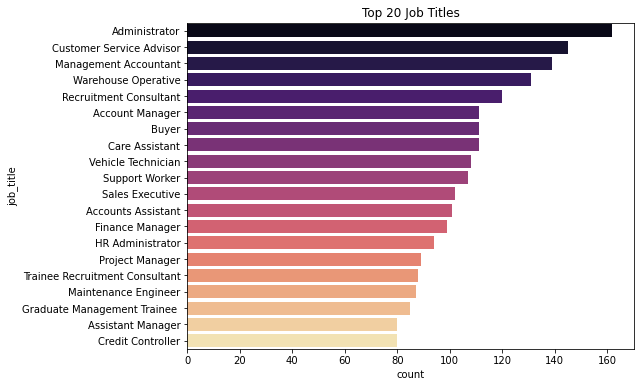

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(y=data.job_title,palette="magma",order = data['job_title'].value_counts()[0:20].index).set_title("Top 20 Job Titles")


Text(0.5, 1.0, 'Top 10 Categories with Highest Minimum Yearly Salary')

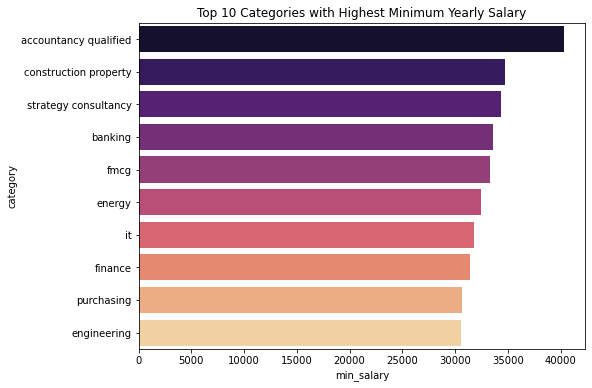

In [43]:
plt.figure(figsize=(8, 6))
salary_table=data.loc[(data.salary_type=="yearly") & (data.min_salary>0)&(data.currency=="GBP")]
salary_table = salary_table[['category', 'min_salary', 'max_salary',]]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['category'])['min_salary'].mean().nlargest(10)).reset_index()
sns.barplot(y='category', x='min_salary', data=jobs_highest_low_range, palette="magma").set_title("Top 10 Categories with Highest Minimum Yearly Salary")


Text(0.5, 1.0, 'Top 10 Categories with Highest Maximum Yearly Salary')

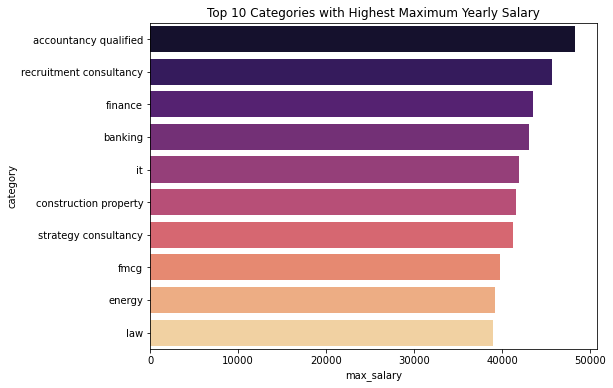

In [44]:
plt.figure(figsize=(8, 6))
jobs_highest_hight_range = pd.DataFrame(salary_table.groupby(['category'])['max_salary'].mean().nlargest(10)).reset_index()
sns.barplot(y='category', x='max_salary', data=jobs_highest_hight_range, palette="magma").set_title("Top 10 Categories with Highest Maximum Yearly Salary")


Text(0.5, 1.0, 'Top 10 worst paying Categories')

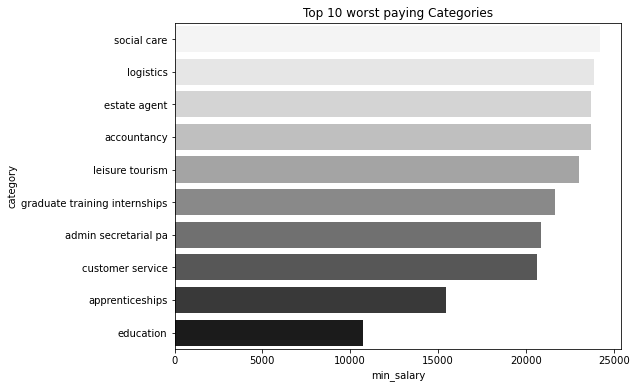

In [45]:
plt.figure(figsize=(8, 6))
salary_table=data.loc[(data.salary_type=="yearly") & (data.min_salary>0)&(data.currency=="GBP")]
salary_table = salary_table[['category', 'min_salary', 'max_salary',]]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['category'])['min_salary'].mean().nsmallest(10)).reset_index()
jobs_highest_low_range=jobs_highest_low_range.sort_values(by='min_salary',ascending=False)
sns.barplot(y='category', x='min_salary', data=jobs_highest_low_range, palette="Greys").set_title("Top 10 worst paying Categories")


Text(0.5, 1.0, 'Top 20 Job Titles with Highest Yearly Salary')

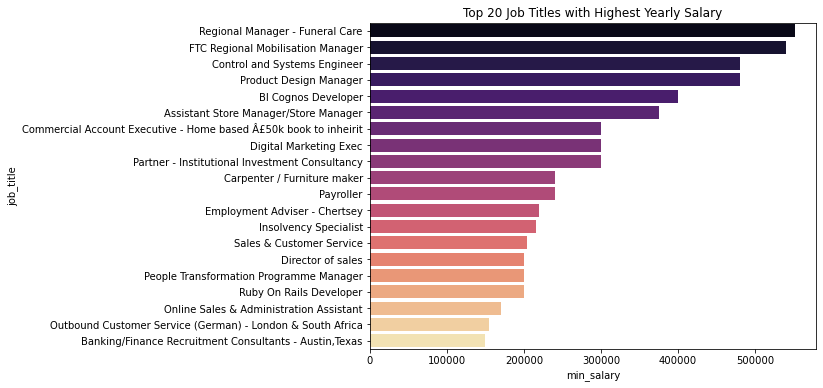

In [46]:
plt.figure(figsize=(8, 6))
salary_table=data.loc[(data.salary_type=="yearly") & (data.min_salary>0)&(data.currency=="GBP")]
salary_table = salary_table[['job_title', 'min_salary', 'max_salary',]]
jobs_highest_low_range = pd.DataFrame(salary_table.groupby(['job_title'])['min_salary'].mean().nlargest(20)).reset_index()
sns.barplot(y='job_title', x='min_salary', data=jobs_highest_low_range, palette="magma").set_title("Top 20 Job Titles with Highest Yearly Salary")
